# Primitives

#### 1. Palindrome number

In [35]:
# O(n) since the entire number is iterated

def isPalindrome(x):
        '''
        :type x: int
        :rtype: bool
        '''
        y = x
        num = []
        if y > 0:
            while y !=0 :
                num.append(str(int(y%10)))
                y = (y-(y%10))/10
            if int(''.join(num)) == x:
                return True
            else:
                return False
        else :
            return False
        
#print(isPalindrome(124421), isPalindrome(-1), isPalindrome(9))

In [34]:
# O(n/2) since only half of the length is traversed

import math

def isPalindrome2(x):
        '''
        :type x: int
        :rtype: bool
        '''
        if x <=0 :
            return False
        
        total_digits = math.floor(math.log10(x)) + 1
        mask = math.pow(10,total_digits - 1)
        
        for i in range(total_digits//2):
            rd = x//mask
            ld = x%10
            
            if ld != rd:
                return False
            
            x %= mask
            x //= 10
            mask //= 100
        
        return True
        
#print(isPalindrome2(124421), isPalindrome2(-1), isPalindrome2(9))

#### 2. Add two integer strings

In [60]:
# similar to paper based right to left addition, result generated in reverse order

# O(k) solution, where k is longer string

def addStrings(s1, s2):
        '''
        :type s1: str
        :type s2: str
        :rtype: str
        '''
        i = len(s1) - 1
        j = len(s2) - 1
        carry = 0
        result = ''
        while i >= 0 or j >=0:
            sum = 0
            sum += carry
            if i >=0 :
                sum += ord(s1[i]) - ord('0')
                i -= 1
                
            if j >= 0 :
                sum += ord(s2[j]) - ord('0')
                j -= 1
                
            val = sum % 10
            carry = sum // 10  # carry is going be 1st digit of sum value i.e either 0 or 1
            result += str(val)
        if carry != 0:
            result += str(carry)
        return result[::-1]
        
        
#print(addStrings("1234567890","1234567890"))

#### 3. Check if given num is power of 2

In [2]:
import math

# O(1) time

def powerOfTwo(input):
        '''
        :type input: int
        :rtype: bool
        '''
        x = math.log2(input)
        y = math.floor(x)
        
        if x == y :
            return True
        else:
            return False


powerOfTwo(12)

False

#### 4. Shortest time difference

In [128]:
# Convert the times into minutes and sort the array, don't forget to take one backward difference on the clock

# O(nlogn)

def timeDifference(times):
        '''
        :type times: list of str
        :rtype: int
        '''
        minutes = []
        dictt = {}
        for i in times:
            temp = i.split(':')
            val = (int(temp[0])*60) + int(temp[1])
            minutes.append(val)
            dictt[val] = i
            
        minutes.sort()
        
        if len(minutes) == 2:
            return (dictt[minutes[1]],dictt[minutes[0]], minutes[1] - minutes[0])
        time1 = 0
        time2 = 0
        diff = 0
        fwd = 0
        for i in range(len(minutes)-1) : 
            if i == 0:
                diff = minutes[i] + (1440-minutes[-1])
                time1, time2 = minutes[i], minutes[-1]
                
            fwd = minutes[i+1] - minutes[i]
            if fwd < diff:
                diff = fwd
                time1, time2 = minutes[i], minutes[i+1]
            
        return (dictt[time1],dictt[time2], diff)
        return

#print(
#        timeDifference(["00:03", "23:59", "12:03"]),
#        timeDifference(["00:01", "00:02"]),
#        timeDifference(["00:00","23:59","00:00"])
#     )    

#### 5. Reverse Bits

In [3]:
#

def reverseBits(input):
        '''
        :type input: int
        :rtype: int
        '''
        powers = []
        while input > 0 :
            power = math.floor(math.log2(input))
            powers.append(power)
            input -= 2**power
        
        binary = 0
        for i in powers:
            binary += 10**i
        
        binary = str(binary)
        rev_num = 0
        
        for i in range(len(binary)):   # no need to reverse the binary since left to right indexing is already reversed
            if binary[i] == '1':       # in regards to binary representation is right to left i.e opposite
                rev_num += 2**i
            
        return rev_num
    

reverseBits(9090)   

4209

#### 6. Sort array having 0,1 and 2 only

In [40]:
# Approach 1 : In-place, Partitioning left and right, two passes required
def sort(nums):
    left = 0
    right = len(nums)-1
    while left <right :
        if nums[left] <= 0:
            left += 1
        if nums[right] != 0:
            right -= 1
        temp = nums[left]
        nums[left] = nums[right]
        nums[right] = temp
    
    left = 0
    right = len(nums)-1
    while left < right :
        while nums[left] != 2 :
            left += 1
            if left == right:    ## for cases where all nums are same
                return nums
        while nums[right] != 1:
            right -= 1
        temp = nums[left]
        nums[left] = nums[right]
        nums[right] = temp
    
    if nums[left] < nums[right]:
        temp = nums[left]
        nums[left] = nums[right]
        nums[right] = temp
    print(nums)
    

        
    
sort([2,2,1,1,1,0,0,0,0])
sort([0,1,2,1,2,2,2,1,0])
sort([0,0,0,0])

[0, 0, 0, 0, 1, 1, 1, 2, 2]
[0, 0, 1, 1, 1, 2, 2, 2, 2]


[0, 0, 0, 0]

In [42]:
# Approach 2 : In-place and Counting sort

def sort2(nums):
    counts = {0:0,1:0,2:0}
    for i in nums:
        counts[i] += 1
    
    for i in range(len(nums)):
        if i <= counts[0]:
            nums[i] = 0
        else:
            if i <= counts[1]:
                nums[i] = 1
            else:
                nums[i] = 2
    return nums

sort([2,2,1,1,1,0,0,0,0])
sort([0,1,2,1,2,2,2,1,0])
sort([0,0,0,0])
        
    

[0, 0, 0, 0, 1, 1, 1, 2, 2]
[0, 0, 1, 1, 1, 2, 2, 2, 2]


[0, 0, 0, 0]

#### 7. Changing base

In [52]:
def change(number, b1, b2):    #b1 to b2 eg. decimal to binary
    powers = []
    new = 0
    
    while number != 0:
        p = math.floor(math.log(number,b2))
        new += b1**p
        number -= b2**p
    return new

change(123, 4, 10)

27

# Arrays

#### 8. Rotate (n x n) Matrix

In [3]:
# Approach one : traversing throught the boundaries layer by layer
'''
The arrow symbols shows how we are traversing the four pointers (at each corner) which is similar to rotation 90 degree clockwise

               
a = [[ 1,  2,  3, 4],
     [ 5,  6,  7, 8],
     [ 9, 10, 11, 12],
     [13, 14, 15, 16]]
                   
                   
    We do this layer by layer
'''

# Since it is n x n matrix, we can use traverse the matrix layer by layer, not suitable for m x n matrix!!!!

# O(n^2) solution
# In-place swapping i.e O(1) space

def rotate(matrix):
        '''
        :type matrix: list of list of int
        :rtype: list of list of int
        '''
        
        size = len(matrix[0])  #size of matrix
        boundary = size - 1  #index of boundary row/col
        
        for layer in range(size//2):
            for i in range(layer, boundary - layer):
    
                top_left = matrix[layer][i]
                top_right = matrix[i][boundary - layer]
                bottom_left = matrix[boundary - i][layer]
                bottom_right = matrix[boundary - layer][boundary - i]
                
                matrix[layer][i] = bottom_left
                matrix[i][boundary - layer] = top_left
                matrix[boundary - i][layer] = bottom_right
                matrix[boundary - layer][boundary - i] = top_right
        
        return matrix
                

In [2]:
# Approach 2 : First flip the matrix then take transpose

def rotate2(matrix):
    size = len(matrix)
    matrix = matrix[::-1]
    matrix = [[matrix[j][i] for j in range(size)] for i in range(size)]
    for i in matrix:
        print(i)

a = [[ 1,  2,  3, 4],
     [ 5,  6,  7, 8],
     [ 9, 10, 11, 12],
     [13, 14, 15, 16]]

rotate2(a)

[13, 9, 5, 1]
[14, 10, 6, 2]
[15, 11, 7, 3]
[16, 12, 8, 4]


#### 9. Spiral Traversal of a matrix

In [292]:
'''
Use four boudaries/fences, traverse along top boundary, from right to left, shift the top boundary
Next along right boundary, from top to bottom, shift the right boundary,
repeat from bottom and left boundaries as above

''' 

# O(m * n)

def spiralOrder(matrix):
        '''
        :type matrix: list of list of int
        :rtype: list of int
        '''
        spiral_order = []
        m = len(matrix)  #4
        n = len(matrix[0]) #3
        top = 0
        right = n - 1
        bottom = m - 1
        left = 0
        
        while top <= bottom and left <= right:
            for i in range(left, right + 1):
                spiral_order.append(matrix[top][i])
            top += 1
        
            for i in range(top, bottom + 1):
                spiral_order.append(matrix[i][right])
            right -= 1
            
            for i in range(right, left-1, -1):
                spiral_order.append(matrix[bottom][i])
            bottom -= 1
            
            for i in range(bottom, top-1, -1):
                spiral_order.append(matrix[i][left])
            left += 1
            
        return spiral_order
        

#### 10. 3-Sum

In [53]:
# O(n^2) solution
# all numbers are unique
# if repeating numbers exist, then use indices in hash_sum table
# For these types of problems use hash tables

def threeSum(A,k):
        '''
        :type A: list of int
        :rtype: list of list of int
        '''
        hash_sum = {}
        
        for i in range(len(A)):
            hash_sum[k-A[i]] = i  
            
        triplets = []    
        for i in range(len(A)-1):
            for j in range(i+1, len(A)):
                if A[i] + A[j] in hash_sum :
                    third_num = A[hash_sum[A[i]+A[j]]]
                    vals = set(A[i], A[j], third_num)
                    if vals not in triplets and len(vals) == 3:
                        triplets.append(vals)

        
        return triplets
            

#### 11. Sudoku validity check

In [55]:
a = [ [5,3,0,0,7,0,0,0,0],
      [6,0,0,1,9,5,0,0,0],
      [0,9,8,0,0,0,0,6,0],
      [8,0,0,0,6,0,0,0,3],
      [4,0,0,8,0,3,0,0,1],
      [7,0,0,0,2,0,0,0,6],
      [0,6,0,0,0,0,2,8,0],
      [0,0,0,4,1,9,0,0,5],
      [0,0,0,0,8,0,0,7,9]]


# O(n^2)

def validSudoku(board):
        '''
        :type board: list of list of int
        :rtype: bool
        '''
        seen = set()
        for i in range(0,9):
            for j in range(0,9):
                v = board[i][j]
                
                if v!= 0 :
                    row = "row{}val{}".format(i,v)
                    col = "col{}val{}".format(j,v)
                    box = "{}{}{}".format(i//3,v,j//3)
                    
                    if row not in seen and col not in seen and box not in seen:
                        seen.add(row)
                        seen.add(col)
                        seen.add(box)
                    
                    else:
                        return False
        return True
validSudoku(a)                                          

True

#### 12. Sub-arrays sum equal to k

In [181]:
def countSubarrays(arr, k):
        '''
        :type arr: list of int
        :type k: int
        :rtype: int
        '''
        size = len(arr)
        count = 0
        for offset in range(0,size-1):
            total = 0
            for i in range(offset, size):
                total += arr[i]
                if total == k:
                    count += 1
                    print(arr[offset:i+1])
        return count
                    
        

# Strings

#### 13. Pattern Matching

In [212]:
# O(n^2)

# convert each string in to a sequence of digits then compare

def findAndReplacePattern(words, pattern):
        '''
        :type words: list of str
        :type pattern: str
        :rtype: list of str
        '''
        matched = []
        pattern = get_num_pattern(pattern)
        for i in words:
            word = get_num_pattern(i)
            if word == pattern:
                matched.append(i)
        
        return matched

def get_num_pattern(string):
    temp = ""
    dictt = {}
    num = 0
    for i in string:
        if i not in dictt:
            dictt[i] = str(num)
            num += 1
            temp += dictt[i]
        else:
            temp += dictt[i]
    return temp
        


#### 14. Add two binary strings

In [218]:
# O(n)


import math
def addBinaryStrings(s1, s2):
        '''
        :type s1: str
        :type s2: str
        :rtype: str
        '''
        return to_binary(to_decimal(s1) + to_decimal(s2))

def to_decimal(string):
    rev = string[::-1] 
    num = 0
    for i in range(len(rev)):
        if rev[i] == '1':
            num += 2**i
    return num

def to_binary(num):
    powers = []
    
    while num > 0:
        power = math.floor(math.log2(num))
        powers.append(power)
        num -= 2**power
        
    binary = 0
    for i in powers:
        binary += 10**i
    return str(binary)
        

#### 15. Palindrome string

In [293]:
# O(n/2)

def validPalindrome(s):
        '''
        :type s: str
        :rtype: bool
        '''
        
        s = s.lower()
        print(s)
        
        l = 0
        r = len(s)-1

        while l < r:
            while not s[l].isalnum():   # use WHILE NOT to keep skipping useless characters
                l += 1
            
            while not s[r].isalnum():   # use WHILE NOT to keep skipping useless characters
                r -= 1   
            
            if s[l] != s[r]:
                return False
            else:
                l += 1
                r -= 1
        
        return True


#### 16. Zig Zag conversion of string

In [2]:
# O(n)

# Increasing then decreasing row numbers along the string gives the zig zag output


def zigzag(s, rows):
        '''
        :type s: str
        :type rows: int
        :rtype: str
        '''
        if rows == 1:
            return s
        
        arr = [""]*rows     #list of n strings
        direction = -1
        i = 0

        for char in s:
            arr[i] += char
            
            if i == 0 or i == rows - 1:     #flipping of direction happens only in the start or end row
                direction = -(direction)     # for first iteration rows increased, to adjust this initialize direction appropriately
            
            if direction == 1:
                i += 1
            else:
                i-= 1
                 
        print(arr)
        return ''.join(arr)                 

#### 17. Longest Palindrome Construction


In [338]:
# O(n) solution


def longestPalindrome(s):
        '''
        :type s: str
        :rtype: int
        '''
        count = {}
        length = 0
        flag = 0
        
        for i in s:
            count[i] = count.get(i, 0) + 1
                        
        for each in count:
            if count[each] % 2 == 0:
                length += count[each]
            else:
                if count[each] > 1:
                    if len(count) == 1:
                        return count[each]
                    length += (count[each] - 1)
                    
                else:
                    if flag == 0 : 
                        length += 1
                        flag = 1
        return length
    
#longestPalindrome("aabbc")        
#longestPalindrome("abbcccd")
longestPalindrome("cC")

1

#### 18. Replace words with Prefix

In [3]:
# O(n^2)

def replaceWordsWithPrefix(prefixes, sentence):
        '''
        :type prefixes: list of str
        :type sentence: str
        :rtype: str
        '''
        mapping = {}
        for i in prefixes:
            mapping[i] = True
            
        line = sentence.split()
        
        for index in range(len(line)):
            word = line[index]
            for i in range(len(word)):
                if word[0:i] in mapping:
                    line[index] = word[0:i]
                    break
        return ' '.join(line)


In [4]:
# O(n)

def solve(prefix, sentence):
    mapping = {}
    for each in prefix:
        mapping[each] = True
    
    result = ''
    temp = ''
    i = 0
    while i < len(sentence):
        temp += sentence[i]
        if temp in mapping:
            result += temp
            result += ' '
            temp = ''
            while sentence[i] != ' ':
                i+= 1
        if sentence[i] == ' ':
                result += temp
                temp = ''    
        i+=1
    result += temp
        
    return result

#### 19. Word subsets

In [410]:
def wordSubsets(A, B):
        '''
        :type A: list of str
        :type B: list of str
        :rtype: list of str
        '''
        map_b = {}
        for i in B:
            temp = mapping(i)
            for each in temp:
                if map_b.get(each,0) < temp[each]:
                    map_b[each] = temp[each]
                    
        print(map_b)   
        for word in A:
            temp_map = mapping(word)
            add = 1
            for char in map_b:
                if temp_map.get(char,0) < map_b[char]:
                    add = 0
                    break
            if add == 1:
                print(word)
                
        
def mapping(string):
    mapp = {}
    for i in string:
        mapp[i] = mapp.get(i,0) + 1
    return mapp
        
        
#wordSubsets(["orange", "room", "more"], ["rm", "oo"])
wordSubsets(['world','warrior', 'war'],['wo','r','a','wrr'])

{'w': 1, 'o': 1, 'r': 2, 'a': 1}
warrior


#### 20. Group together Anagrams

In [14]:
# Approach One:
# O(n * mlogm)
# 
# Set method works iff each string has same no. of repeating characters
# as seen in below example
def groupAnagrams(words):
        '''
        :type words: list of str
        :rtype: list of list of str
        '''
        anagrams = {}
    
        for each in words:
            if anagrams.get(tuple(set(each)),0) == 0:
                anagrams[tuple(set(each))] = [each]
            else:
                anagrams[tuple(set(each))].append(each)
        return anagrams


In [15]:
# Approach Two: 
# O(mn)
# Counting and indexing array w.r.t to alphabets

def solve(words):
    mapping = {}
    
    for each in words:
        code = encode(each)
        if mapping.get(code,0) == 0:
            mapping[code] = [each]
        else:
            mapping[code].append(each)
            
    return mapping

def encode(word):
    letters = [0]*26

    for char in word:
        index = abs(97-ord(char))
        letters[index] += 1
    
    encoding = ''.join(str(i) for i in letters)
    
    return encoding

solve(["aae","aea","aeae","aaee", "eat", "bat", "ate", "tab", "tea", "eat"])

{'20001000000000000000000000': ['aae', 'aea'],
 '20002000000000000000000000': ['aeae', 'aaee'],
 '10001000000000000001000000': ['eat', 'ate', 'tea', 'eat'],
 '11000000000000000001000000': ['bat', 'tab']}

#### 21. Longest substring without repeating characters

In [21]:
# O(n*m) for generating all substrings

def longestUniqueCharacterSubstring(s):
        '''
        :type s: str
        :rtype: int
        '''
        offset = 0
        result = 0
        while offset < len(s):
            i = offset
            mapping = set()
            while i < len(s):
                if s[i] not in mapping:
                    mapping.add(s[i])
                else:
                    break
                i += 1
            result = max(result, len(mapping))
            offset += 1
        return result
        
longestUniqueCharacterSubstring('abcdedcbaef')
longestUniqueCharacterSubstring('ABCABADEC')

5

In [29]:
# O(n) for sliding window approach

def sliding_window(s):
    l,r = 0,0
    result = 0
    mapping = {}   # WINDOW (with char indexes)
    
    while r < len(s):
        if s[r] not in mapping:
            mapping[s[r]] = r
        else:
            l = mapping[s[r]] + 1
            mapping[s[r]] = r
        
        result = max(result, len(mapping))
        r += 1
            
    return result

sliding_window('abcdedcbaef')
            

6

#### 22. Print all unique repeating substrings

In [74]:
def get_substrings(string):
    temp = string[0]
    s = set()
    i = 1
    
    while i < len(string):
        if string[i] != temp[-1]:
            s.add(temp) 
            temp = ''
        temp += string[i]
        i += 1
        
    s.add(temp)   # the last substring won't be added because addition takes place 
                  # only on encountering a different character
    return s

get_substrings('aabaaabbbaaccddcce')

{'aa', 'aaa', 'b', 'bbb', 'cc', 'dd', 'e'}

# Stacks and Queues

#### 23. Balanced Parantheses

In [31]:
# O(n)

def isValid(s):
        '''
        :type s: str
        :rtype: bool
        '''
        stack = []
        for i in s:
            if i == '(' or i == '[' or i == '{':
                stack.append(i)
            else:
                if stack == [] or (i == ')' and stack[-1]!='(') or (i == ']' and stack[-1]!='[') or (i == '}' and stack[-1]!='{') :
                    return False
                else:
                    stack.pop()
        
        if stack != []:
            return False
        else:
            return True
     
    
isValid('([{}])}')

False

#### 24. Compute Buildings With A Sunset View

In [464]:
def getBuildingsWithAView(buildings):
        '''
        :type buildings: list of int
        :rtype: list of int
        '''
        
        result = [0]
        tall = buildings[0]
        for i in range(1,len(buildings)):
            if buildings[i] > tall:
                result.append(i)
                tall = buildings[i]
        return result
        

#### 25. Undo Redo Actions

In [488]:
def performEditorActions(actions):
        '''
        :type actions: list of list of str
        :rtype: str
        '''
        mapp = {'INSERT':1, 'DELETE':2, 'UNDO':3, 'REDO':4}
        acts = []
        undo = []
        for i in actions:
            val = mapp[i[0]]
            if val == 1 or val == 2:
                acts.append(i)
            if val == 3:
                temp = acts.pop()
                undo.append(temp)
            if val == 4 and undo != []:
                acts.append(undo.pop())
        
        string = []
        for i in acts:
            val = mapp[i[0]]
            if val == 1:
                string.append(i[1])
            else:
                string.pop()
        return ''.join(string)
           

            
performEditorActions([["INSERT","a"],["INSERT","b"],['UNDO'],['REDO'],['REDO']])


'ab'

#### 26. Implement Queue using stacks

In [45]:
class Q():
    def __init__(self):
        self.size = 0
        self.stack1 = []
        self.stack2 = []
    
    def isEmpty(self):
        if self.stack1 == []:
            return True
        
    def push(self, value):
        self.stack1.append(value)
        self.size += 1
        print(self.stack1)
        
    def pop(self):
        if self.isEmpty():
            return 'Queue is empty!'
        while self.stack1 != []:
            self.stack2.append(self.stack1.pop(-1))
        value = self.stack2.pop(-1)
        self.size -= 1
        while self.stack2 != []:
            self.stack1.append(self.stack2.pop(-1))
        print(self.stack1)
    
q = Q()
q.push('a')
q.push('b')
q.push('c')
q.push('d')
q.pop()
q.pop()

['a']
['a', 'b']
['a', 'b', 'c']
['a', 'b', 'c', 'd']
['b', 'c', 'd']
['c', 'd']


#### 27. Minimal removal of parantheses for Valid string

In [47]:
def removal(s):
    stack = []

    string = list(s)  # since strings are immutable
    
    for i,char in enumerate(string):
        if char == '(':
            stack.append(i)
        if char == ')':
            if stack:
                stack.pop()
            else:
                string[i] = ''   # GOOD PYTHONIC TRICK of deleting chars using indexes
    
    while stack:
        string[stack.pop()] = ''
        
    return ''.join(string)

removal('a)b(c)d')

'ab(c)d'

# Linked Lists

##### Designing a linked list

In [48]:
class Node():
    def __init__(self, val):
        self.val = val      #type Data
        self.next = None    #type Node

In [49]:
class ll():
    def __init__(self):
        self.head = None    #type Node
        self.size = 0
        
    def add_at_head(self,val):
        new_node = Node(val)
        new_node.next = self.head
        self.head = new_node
        self.size += 1
        
    def add_at_index(self,index,val):
        if index == 0 or self.size == 0:
            self.add_at_head(val) #size increment included in any ADD function, thus increment not needed
        else:
            new_node = Node(val)
            temp = self.head
            for i in range(index-1):
                temp = temp.next
            new_node.next = temp.next
            temp.next = new_node
            self.size += 1
            
    def delete_at_index(self,index):
        prev = None
        curr = self.head
        if index >=2 :
            for i in range(index-1):
                prev = curr
                curr = curr.next
            prev.next = curr.next #we are deleting the CURR node, which is present at the given index
        else:
            self.head = curr.next
        self.size -= 1
        
    def get_val(self,index):
        temp = self.head
        for i in range(index-1):
            temp = temp.next
        return(temp.val)    
        
    def view(self):
        if self.size == 0 :
            print('List empty')
        else:
            temp = self.head
            while temp != None:
                print(temp.val,'-->',end='')
                temp = temp.next
            print(temp, '   size:',self.size)
    
                

In [50]:
a = ll()
a.add_at_head(2)
a.add_at_head(4)
a.add_at_head(5)
a.view()

a.add_at_index(2,1)
a.view()

a.add_at_index(a.size, 0)
a.view()

a.add_at_index(0, -3)
a.view()

a.delete_at_index(a.size)
a.view()

a.head.val

5 -->4 -->2 -->None    size: 3
5 -->4 -->1 -->2 -->None    size: 4
5 -->4 -->1 -->2 -->0 -->None    size: 5
-3 -->5 -->4 -->1 -->2 -->0 -->None    size: 6
-3 -->5 -->4 -->1 -->2 -->None    size: 5


-3

#### 28. Even Odd Partition

In [51]:
class solution:
            
    def oddEvenList(self,head):
        even_dummy = Node(-1)
        even_ptr = even_dummy
        odd_dummy = Node(-1)
        odd_ptr = odd_dummy
        curr = head
        index = 0
        while curr != None:
            if index%2 == 0:
                even_ptr.next = curr
                even_ptr = even_ptr.next
            else:
                odd_ptr.next = curr
                odd_ptr = odd_ptr.next
            index += 1
            curr = curr.next
        even_ptr.next = odd_dummy.next
        odd_ptr.next = None
        return even_dummy.next
        

        
b = solution()
b.oddEvenList(a.head)
a.view()

-3 -->4 -->2 -->5 -->1 -->None    size: 5


#### 29. Overlapping Linked List / Intersection

In [52]:
c = ll()
c.add_at_head(8)
c.add_at_head(6)
c.add_at_head(4)
c.add_at_head(3)
c.add_at_head(2)
c.add_at_head(1)
c.view()

1 -->2 -->3 -->4 -->6 -->8 -->None    size: 6


In [53]:
d = ll()
d.add_at_head(13)
d.add_at_head(12)
d.head.next.next = c.head.next.next.next.next
d.view()
c.view()

12 -->13 -->6 -->8 -->None    size: 2
1 -->2 -->3 -->4 -->6 -->8 -->None    size: 6


In [54]:
# Method 1 : using a set of unique memory addresses

def intersect1(list1,list2):
    ptr1 = list1.head
    ptr2 = list2.head
    nodes1 = set()
    while ptr1 != None:
        nodes1.add(ptr1)
        ptr1 = ptr1.next
    
    while ptr2 != None:
        if ptr2 in nodes1:
            return ptr2.val
        ptr2 = ptr2.next
        
intersect1(d,c)

6

In [55]:
# Method 2 : Using two pointers and given length of both lists

def intersect2(list1,list2,m,n):
    ptr1 = list1.head
    ptr2 = list2.head
    if m > n:
        for i in range(m-n):
            ptr1 = ptr1.next
    else:
        for i in range(n-m):
            ptr2 = ptr2.next
    
    while ptr1!= None : 
        if ptr1 == ptr2 :
            return ptr1.val
        ptr1 = ptr1.next
        ptr2 = ptr2.next
    return None
    
intersect2(d,c,4,6)

6

#### 30. Remove kth to last element

In [56]:
c = ll()
c.add_at_head(3)
c.add_at_head(2)
c.add_at_head(1)
c.view()

class Solution:
    def removeKthToLast(self, head, k):
        '''
        :type head: ListNode
        :type k: int
        :rtype: ListNode
        '''
        forw = head
        curr = head    #node to be deleted
        temp = None
        
        for i in range(k-1):
            forw = forw.next
        
        if forw.next == None:
            head = curr.next
            return head
            
        while forw.next!= None:
            temp = curr
            curr = curr.next
            forw = forw.next
        temp.next = curr.next
           
        
        return curr.val
        
sol = Solution()
sol.removeKthToLast(c.head, 3)
#c.view()

1 -->2 -->3 -->None    size: 3


#### 31. Right shift a singly linked list by k steps

In [57]:
c = ll()
c.add_at_head(4)
c.add_at_head(3)
c.add_at_head(2)
c.add_at_head(1)
c.view()


class Solution:
    def rotateRight(self, head, k):
        '''
        :type head: ListNode
        :type k: int
        :rtype: ListNode
        '''
        temp = head
        curr = head
        forw = head
        new_head = None
        for i in range(k):
            forw = forw.next
            
        if forw == None:    # NOT forw.next since k-1 not used above
            return head
        
        while forw.next != None:
            forw = forw.next
            curr = curr.next
            
        new_head = curr.next
        head = new_head
        forw.next = temp
        curr.next = None
        return head.val
            
        
sol = Solution()
sol.rotateRight(c.head, 2)

1 -->2 -->3 -->4 -->None    size: 4


3

#### 32. Add 2 integers represented as Linked List

In [65]:
c = ll()
c.add_at_head(4)
c.add_at_head(9)
c.add_at_head(2)
c.add_at_head(1)
c.view()

d = ll()
d.add_at_head(3)
d.add_at_head(2)
d.add_at_head(1)
d.view()

class Solution:
    def addTwoNumbers(self, l1, l2):
        '''
        :type l1: ListNode
        :type l2: ListNode
        :rtype: ListNode
        '''
        ptr1 = l1.head
        ptr2 = l2.head
        dummy = Node(-1)
        ptr3 = dummy
        carry = 0
    
        while ptr1 or ptr2:
            first = ptr1.val if ptr1 else 0
            second = ptr2.val if ptr2 else 0
            total = first + second + carry
            ptr3.next = Node(total%10)
            carry = total//10
            if ptr1:                 # check bcz if both strings are of different length
                ptr1 = ptr1.next     # the shorter one may have already reached NONE
            if ptr2:
                ptr2 = ptr2.next
            ptr3 = ptr3.next
        
    
        temp = dummy.next
        while temp:
            print(temp.val, end = ' ')
            temp = temp.next
        
        
sol = Solution()
sol.addTwoNumbers(c,d)

1 -->2 -->9 -->4 -->None    size: 4
1 -->2 -->3 -->None    size: 3
2 4 2 5 

#### 33. Testing for Cycles

In [144]:
class Solution:
    def hasCycle(self, head):
        '''
        :type head: ListNode
        :rtype: bool
        '''
        addresses = set()
        ptr = head

        while ptr != None:
            if ptr not in addresses:
                addresses.add(ptr)
            else:
                return True
            ptr = ptr.next

        if ptr == None:
            return False

#### 34. Swap linked list nodes in pairs

In [156]:
# Exchanging only values
class Solution:
    def swapInPairs(self, head):
        '''
        :type head: ListNode
        :rtype: ListNode
        '''
        curr = head

        while curr!=None and curr.next!=None:
            temp = curr.val
            curr.val = curr.next.val
            curr.next.val = temp
            
            curr = curr.next.next
            
        

    
c = ll()
c.add_at_head(7)
c.add_at_head(6)
c.add_at_head(5)
c.add_at_head(4)
c.add_at_head(3)
c.add_at_head(2)
c.add_at_head(1)
c.view()

sol = Solution()
sol.swapInPairs(c.head)
c.view()



1 -->2 -->3 -->4 -->5 -->6 -->7 -->None    size: 7
2 -->1 -->4 -->3 -->6 -->5 -->7 -->None    size: 7


In [107]:
a = ll()
#a.add_at_head('f')
a.add_at_head('e')
a.add_at_head('d')
a.add_at_head('c')
a.add_at_head('b')
a.add_at_head('a')
a.view()

def solve(ll):
    curr = ll.head
    fwd = curr.next
    ll.head = fwd
    
    while True:
        temp = fwd.next
        fwd.next = curr

        if temp == None or temp.next == None: #changing over next segment only when confirming its not None or last node
            curr.next = temp   #if None is reached then last pointer to NONE
            break 
            
        curr.next = temp.next
        curr = temp
        fwd = curr.next
        
    ll.view()

solve(a)

a -->b -->c -->d -->e -->None    size: 5
b -->a -->d -->c -->e -->None    size: 5


#### 35. Clone a LL with Random Pointers

In [134]:
# Using a Hashtable of memory addresses i.e Keys as old nodes and values as new nodes (with pointers 
# to other nodes in values)
import collections
class Node:
    def __init__(self,val):
        self.val = val
        self.next = None
        self.random = None

class Solution:
    def copyRandomList(self, head):
        dictt = collections.defaultdict(lambda: Node(0)) # Default Dict full of Node(0,None,None) as values
        curr = head
        dictt[None] = None
            
        while curr:
            dictt[curr].val = curr.val
            dictt[curr].next = dictt[curr.next]
            dictt[curr].random = dictt[curr.random]
            curr = curr.next
    
        return dictt[head]

    
original_list = Node(1)
original_list.next = Node(2)
original_list.next.next = Node(3)
original_list.next.next.next = Node(4)
original_list.next.next.next.next = Node(5)
original_list.random = original_list.next.next
 
# 2's random points to 1
original_list.next.random = original_list
 
# 3's random points to 5
original_list.next.next.random = original_list.next.next.next.next
 
# 4's random points to 5
original_list.next.next.next.random = original_list.next.next.next.next
 
# 5's random points to 2
original_list.next.next.next.next.random = original_list.next
    
    
solve = Solution()
solve.copyRandomList(original_list)

# Recursion

In [19]:
# Counting vowels

def is_vowel(char):
    v = 'aeiou'
    if char.lower() in v:
        return 1
    else:
        return 0

def count1(string):
    if len(string) == 0:
        return 0
    else:
        return count1(string[:len(string)-1]) + is_vowel(string[-1])

                                        
count1('tyeids')
                                            

2

In [55]:
#Pascal's Triangle

def triangle(num):
    if num == 0:
        return [1]
    else:
        line = [1]
        previous = triangle(num-1)
        
        for i in range(len(previous)-1):
            line.append(previous[i] + previous[i+1])
            
        line += [1]
        
        return line


triangle(5)

[1, 5, 10, 10, 5, 1]

In [75]:
# Square of a number

def square(n):
    if n == 1:
        return 1
    else:
        return (square(n-1) + 2*n - 1)
square(4)

16

In [94]:
# Find index of first occurence of a number in an array

def find(arr,num,i):
    if arr == []:
        return 'Not found'
    if arr[0] == num:
        return i
    else:
        return find(arr[1:],num,i+1)
    
find([3,5,6,7],7,0)

3

In [109]:
# Fibonacci

def fib(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    else:
        return (fib(n-2)+fib(n-1))
    
fib(7)

13

In [142]:
# GCD

def gcd(m,n):
    if m == n:
        return m
    else:
        if m > n:
            return gcd(m-n,n)
        else:
            return gcd(m,n-m)
        
gcd(12,6)

6

# Searching

#### Binary Search

In [5]:
def binary_search(data,num):
    l = 0
    r = len(data)-1
    
    while l <= r:
        mid = (l+r)//2
        
        if data[mid] == num:
            return print(num,'found at :',mid)
        
        if data[mid] > num:
            r = mid - 1    #prune right side to reduce search space
            
        else:
            l = mid + 1    #prune left side to reduce search space
            
    return print('Not found!')

binary_search([1,4,6,9,12,22,43,55], 3)
binary_search([1,4,6,9,12,22,43,55], 22)

Not found!
22 found at : 5


#### 36. Find Closest Number

In [2]:
# O(logn) , O(1)

def find_closest_num(arr, num):
    l = 0
    r = len(arr)-1
    closest = None
    while l <= r:
        mid = (l+r)//2        
        if mid < len(arr)-1 and mid > 0:   # to handle special case of mid reaching 0 or len(arr)-1
            diff_left = abs(arr[mid-1]-num)
            diff_mid = abs(arr[mid]-num)
            diff_right = abs(arr[mid+1]-num)
            if diff_left < diff_mid:
                r = mid - 1
            elif diff_right <= diff_mid:  # to handle EDGE CASE mentioned below
                l = mid + 1
            else:
                return arr[mid]
        else:
            return arr[mid]   # mid has reached 0 or len(arr)-1, which is the answer


print(find_closest_num([2, 5, 6, 7, 8, 8, 9], 8))    #special case
print(find_closest_num([1, 2, 4, 5, 6, 6, 8, 9], 6)) #special case
print(find_closest_num([1, 2, 2, 4, 8, 8, 9], 2))
print(find_closest_num([1, 2, 2, 4, 8, 8, 9], 8))
print(find_closest_num([1, 2, 2, 4, 8, 8, 9],11))

print(find_closest_num([1,4,5,6,7,7,8,9,9,22],11)) # Important edge case
# This is an edge case where repetition occurs on mid+1, then = sign needed

8
6
2
8
9
9


#### 37. Find fixed point

In [91]:
# O(logn), O(1)

def find(A):
    left = 0
    right = len(A) - 1
    
    while left <= right :
        mid = (left + right)//2
# We don't need to check for L or R bcz the conditions and traversal are dependent on mid        
        if A[mid] < mid :  
            left = mid + 1
        elif A[mid] > mid:
            right = mid - 1
        else:
            return mid   # A[mid] == mid
    
    return None

print(find([-10, -5, 0, 3, 7]))
print(find([0, 2, 5, 8, 17]))
print(find([-10, -5, 3, 4, 7, 9]))


3
0
None


#### 38. Find peak in Bitonically sorted array

In [4]:
# O(logn), O(1)

def find(arr):
    l = 0
    r = len(arr)-1
    
    while l <= r :
        mid = (l+r)//2
        if mid == 0 or mid == len(arr)-1:    # Edge cases of INC or DSC sorted array
            return max(arr[l],arr[mid],arr[r])    # MAX used to eliminate edge cases
        if arr[mid-1] < arr[mid] < arr[mid+1]:
            l = mid + 1
        elif arr[mid-1] > arr[mid] > arr[mid+1]:
            r = mid - 1
        else:
            return max(arr[l],arr[mid],arr[r])   # using MAX guarantees the right solution

            
print(find([1, 2, 3, 4, 5, 4, 3, 2, 1]))
print(find([1, 6, 5, 4, 3, 2, 1]))
print(find([1, 2, 3, 4, 5]))
print(find([5, 4, 3, 2, 1]))
print(find([1, 6, 4, 3, 2, 1]))  # Edge case!!!!


5
6
5
5
6


#### 39. Find First Entry in List with Duplicates

In [121]:
# O(logn), O(1)

def find(A,num):
    l = 0
    r = len(A) - 1
    
    while l <= r:
        mid = (l+r)//2
        
        if A[mid] > num:
            r = mid - 1
        elif A[mid] < num:
            l = mid + 1
        else:
            if A[mid-1] == num:
        #pruning all the NUMs occuring on right side of repeating sequence        
                r = mid - 1     
            else:
                return mid
            
    return 'Not found!'

print(find([-14, -10, 2, 108, 108, 243, 285, 285, 285, 401], 285))
print(find([-14, -10, 2, 108, 108, 108, 108, 243, 285, 285, 285, 401], 108))
print(find([-14, -14, -10, 2, 108, 108, 243, 285, 285, 285, 401], -14))

6
3
0


#### 40. Find a number whose square is closest or equal to given number

In [243]:
# O(logn)

def get_closest(num):
    l = 1
    r = num
    
    while l < r :
        if r - l == 1:    # SO that when l,mid,r remains same, break the infinite while loop
            return l
        m = (l+r)//2
        if m**2 > num:
            r = m
        elif m**2 < num:
            l = m
        else:
            return m
    
get_closest(300)

17

#### 41. Find smallest element in a Cyclically Sorted array

In [11]:
def solve(arr):
    l = 0
    r = len(arr)-1
    
    while l <= r:

        mid = (l+r)//2
        if mid == len(arr)-1 or (arr[mid] < arr[mid-1] and arr[mid] < arr[mid+1]):
            return arr[mid]
        elif arr[r] > arr[mid] > arr[l]:
            r = mid - 1
        else:
            l = mid + 1
            
    


print(solve([1,2,3,4,5,6]))
print(solve([3,4,5,6,1,2]))
print(solve([5,4,3,2,1]))
print(solve([4,5,6,1,2,3]))

1
1
1
1


#### 42. Intersection of two sorted arrays

In [220]:
# Approach : Very good to iterate over two differently sized sorted arrays

def intersection(nums1, nums2):
    result = set()
    ptr1 , ptr2 = 0 , 0
    
    while ptr1<len(nums1) and ptr2<len(nums2):
        if nums1[ptr1] < nums2[ptr2]:
            ptr1 += 1
        elif nums2[ptr2] < nums1[ptr1]:
            ptr2 += 1
        else:
            result.add(nums1[ptr1])
            ptr1 += 1
            ptr2 += 1
            
    return list(result)

intersection([1,2,3,4],[1,1,3,3,5])

[1, 3]

#### 43. Search a sorted 2D Matrix

In [228]:
# Variant 1 --- 
# Not strictly sorted
# when first element in row i+1 may not be greater than last element in row i
# O(NlogN)

def search1(matrix, target):
    for row in matrix:
        if binary(row,target):
            return True
    return False

def binary(arr, val):
    l,r = 0,len(arr)-1

    while l <= r:
        mid = (l+r)//2
        if arr[mid] == val:
            return True
        if arr[mid] < val:
            l = mid + 1
        elif arr[mid] > val :
            r = mid - 1
    return False

a = [
  [1, 4, 7, 11],
  [8, 9, 10, 20],
  [11, 12, 17, 30]
]
print(search1(a,30))
print(search1(a,0))

True
False


In [231]:
# Variant 2 --- 
# Strictly sorted
# when first element in row i+1 is greater than last element in row i
# O(N)

def search2(matrix, target):
    arr = []
    for i in matrix:
        if target <= i[-1]:
            arr = i 
            break
    if arr == []:
        return False
    else:
        return binary(arr, target)

def binary(arr, val):
    l,r = 0,len(arr)-1

    while l <= r:
        mid = (l+r)//2
        if arr[mid] == val:
            return True
        if arr[mid] < val:
            l = mid + 1
        elif arr[mid] > val :
            r = mid - 1
    return False

b = [
  [0, 1, 2, 3],
  [4, 5, 6, 7],
  [8, 9, 10, 11]
]
print(search2(b,11))
print(search2(b,12))

True
False


#### 44. Computer square root of an integer

In [240]:
def sqrt(n):
    l,r = 1,n
    
    while l <= r and r-l > 1:
        mid = (l+r)//2
        if mid*mid == n:
            return mid
        if mid*mid > n:
            r = mid
        else :
            l = mid
    return l

print(sqrt(13))
print(sqrt(25))

3
5


# Graphs

In [41]:
from collections import defaultdict
import networkx as nx

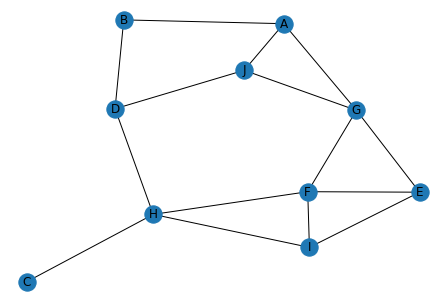

In [14]:
g1 = defaultdict(list)
g1 = {
  'A' : ['B','J','G'],
  'B' : ['A','D'],
  'C' : ['H'],
  'D' : ['B','J','H'],
  'E' : ['F','G','I'],
  'F' : ['G','E','I','H'],
  'G' : ['A','J','F','E'],
  'H' : ['D','F','I','C'],
  'I' : ['E','F','H'],
  'J' : ['A','D','G']
}
G1 = nx.Graph(g1)
nx.draw(G1, with_labels = True)

#### Breadth First Search

In [11]:
def bfs(graph, source):
    q = []
    visited = set()
    result = []
    
    q.append(source)
    visited.add(source)
    
    while q:
        curr = q.pop(0)
        result.append(curr)
        
        for adj in graph[curr]:
            if adj not in visited:
                q.append(adj)
                visited.add(adj)
                
    return result

bfs(g1, 'A')

['A', 'B', 'J', 'G', 'D', 'F', 'E', 'H', 'I', 'C']

#### Depth First Search

#### Iterative

In [12]:
def dfs(graph, source):
    stack = []
    visited = set()
    result = []
    
    stack.append(source)
    visited.add(source)
    
    while stack:
        curr = stack.pop()
        result.append(curr)
        
        for adj in graph[curr]:
            if adj not in visited:
                stack.append(adj)
                visited.add(adj)
                
    return result

dfs(g1, 'A')

['A', 'G', 'E', 'I', 'H', 'C', 'D', 'F', 'J', 'B']

#### Recursive

In [49]:
def dfs_rec(graph,source):
    visited = set()
    get_dfs(graph,source,visited)
    
def get_dfs(graph,vtx,visited):
    
    visited.add(vtx)
    print(vtx,end=' ')
    
    for adj in graph[vtx]:
        if adj not in visited:
            get_dfs(graph,adj,visited)
            

dfs_rec(g1,'A')

A B D J G F E I H C 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 12]
1 8 12 9 11 13 10 7 2 6 3 5 4 

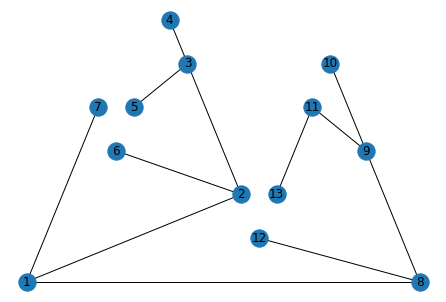

In [58]:
# Both Iterative and Recursive give different DFS traversals, but each one is correct!!!

g = defaultdict(list)     # depeding on the order of children in adj list, the DFS slightly changes
g = {
    1 : [8,7,2],          # children arranged in decreasing order
    2 : [6,3,1],
    3 : [5,4,2],
    4 : [3],
    5 : [3],
    6 : [2],
    7 : [1],
    8 : [12,9,1],
    9 : [11,10,8],
    10: [9],
    11: [9,13],
    12: [8],
    13: [11]
}

G = nx.Graph(g)
nx.draw_planar(G, with_labels=True, arrows=False)

print(dfs(g,1))    
dfs_rec(g,1)       
# Over here iterative gives the desired output



def dfs_rec2(graph,source):
    visited = set()
    get_dfs2(graph,source,visited)
    
def get_dfs2(graph,vtx,visited):
    
    visited.add(vtx)
    print(vtx,end=' ')
    
    for adj in graph[vtx]:
        if adj not in visited:
            get_dfs(graph,adj,visited)


[1, 8, 12, 9, 11, 10, 7, 2, 6, 3, 5, 4]
1 2 3 4 5 6 7 8 9 10 11 12 

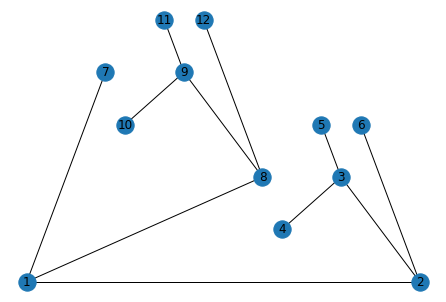

In [57]:
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt

g = defaultdict(list)
g = {
    1 : [2,7,8],      # children arranged in increasing order
    2 : [1,3,6],
    3 : [2,4,5],
    4 : [3],
    5 : [3],
    6 : [2],
    7 : [1],
    8 : [1,9,12],
    9 : [8,10,11],
    10: [9],
    11: [9],
    12: [8],
}

G = nx.Graph(g)
nx.draw_planar(G, with_labels=True, arrows=False)

print(dfs(g,1))    
dfs_rec(g,1)       
# Over here recursive gives the desired output

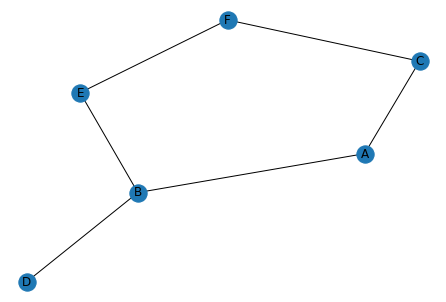

In [236]:
g2 = defaultdict(list)
g2 = {
  'A' : ['B','C'],
  'B' : ['D', 'E'],
  'C' : ['F'],
  'D' : [],
  'E' : ['F'],
  'F' : []
}
G2 = nx.Graph(g2)
nx.draw(G2, with_labels = True)

In [237]:
print(bfs(g2, 'A'))
print(dfs(g2, 'A'))

['A', 'B', 'C', 'D', 'E', 'F']
['A', 'C', 'F', 'B', 'E', 'D']


#### 45. Detect cycle in a UNdirected graph (if Source Node is Given)

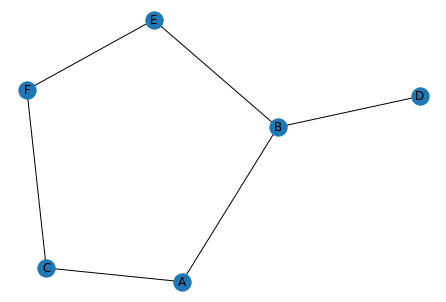

In [333]:
g3 = defaultdict(list)
g3 = {
  'A' : ['B'],
  'B' : ['E','D'],
  'C' : ['A'],
  'D' : [],
  'E' : ['F'],
  'F' : ['C']
}
G3 = nx.Graph(g3)
nx.draw(G3, with_labels = True)

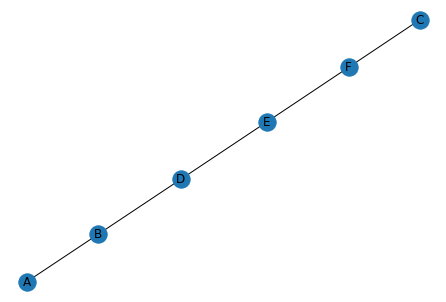

In [344]:
g4 = defaultdict(list)
g4 = {                  # In making an adjacency list one can show
  'A' : ['B'],          # leaf nodes by 'C':[]
  'B' : ['D'],
  'D' : ['E'],
  'E' : ['F'],
  'F' : ['C'],
  'C': []
}
G4 = nx.Graph(g4)
nx.draw(G4, with_labels = True)

In [345]:
def detect_cycle(graph, source):  #using bfs ----> WORKS ONLY FOR UNDIRECTED GRAPHS
    q = []
    visited = set()
    q.append(source)
    visited.add(source)
    while q:
        curr = q.pop(0)
        for adj in graph[curr]:
            if adj not in visited :
                if adj in graph: #Always check if the node exists in the graph before adding to Q
                    q.append(adj) #Bcz the node may be a leaf node
                visited.add(adj)
            else:
                return 'Cycle exists!'
                
    return 'No Cycle exists!'

print(detect_cycle(g3,'B'))
print(detect_cycle(g4,'A'))

Cycle exists!
No Cycle exists!


#### 46. Detect cycle in a UNdirected graph (without given source node)

In [325]:
# Running BFS from each non-leaf node of the graph until a cycle is found
# O(V(V+E)) complexity 
def detect_cycle2(graph):  
    for source in graph:
        if graph[source] != []:
            q = []
            visited = set()
            q.append(source)
            visited.add(source)
            while q:
                curr = q.pop(0)
                for adj in graph[curr]:
                    if adj not in visited :
                        if adj in graph: 
                            q.append(adj) 
                        visited.add(adj)
                    else:
                        return 'Cycle exists!'
                
    return 'No Cycle exists!'

#### 47. Detect cycle in a Directed graph

In [461]:
# Approach : using RECURSIVE DFS
# O(V+E) time, O(V) space

def isCyclic(graph):
    state = {v:'white' for v in graph}
    for v in graph:
        if state[v] == 'white' and cycleFromVertex(v,graph,state):
            print(state)
            return True
    return False

def cycleFromVertex(vtx,graph,state):
    if state[vtx] == 'gray':   # cycle exists
        return True
    
    state[vtx] = 'gray'
    for adj in graph[vtx]:                                             #picking up adj vtx and running DFS on each
        if state[adj] != 'black' and cycleFromVertex(adj,graph,state): # if adjacent vtx lead to a path if cycle
            return True     
    
    state[vtx] = 'black'  # current vertex leads to no cycle
    return False


{1: 'gray', 2: 'black', 3: 'gray', 4: 'black', 5: 'gray', 6: 'gray', 7: 'white', 8: 'white', 9: 'white', 10: 'white', 11: 'white', 12: 'white'}
True


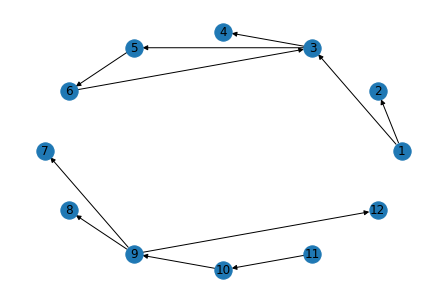

In [462]:
g5 = defaultdict(list)
g5 = {
    1 : [2,3],
    2 : [],
    3 : [4,5],
    4 : [],
    5 : [6],
    6 : [3],
    7 : [],
    8 : [],
    9 : [7,8,12],
    10 : [9],
    11 : [10],
    12 : []
}

G5 = nx.DiGraph(g5)
nx.draw_circular(G5, arrows = True, with_labels = True)
print(isCyclic(g5))

False


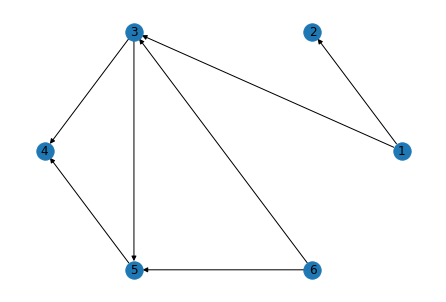

In [370]:
g6 = defaultdict(list)
g6 = {
    1 : [2,3],
    2 : [],
    3 : [4,5],
    4 : [],
    5 : [4],
    6 : [3,5],
}

G6 = nx.DiGraph(g6)
nx.draw_circular(G6, arrows = True, with_labels = True)
print(isCyclic(g6))

#### 48. Number of cycles in a Directed Graph

In [59]:
def count_cycles(graph):
    state = {v:'white' for v in graph}
    count = 0
    for v in graph:
        if state[v] == 'white' and cycleFromVertex(v,graph,state):
            count += 1
    return count

def cycleFromVertex(vtx,graph,state):
    if state[vtx] == 'gray':   # cycle exists
        return True
    
    state[vtx] = 'gray'
    for adj in graph[vtx]:                                             #picking up adj vtx and running DFS on each
        if state[adj] != 'black' and cycleFromVertex(adj,graph,state): # if adjacent vtx lead to a path if cycle
            return True     
    
    state[vtx] = 'black'  # current vertex leads to no cycle
    return False

3

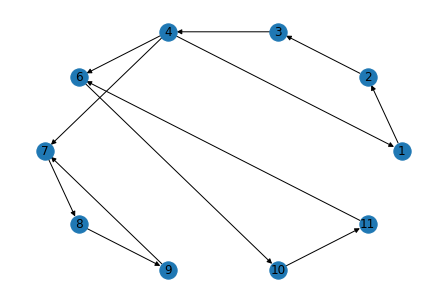

In [60]:
g7 = defaultdict(list)
g7 = {
    1: [2],
    2: [3],
    3: [4],
    4: [1,6,7],
    6: [10],
    7: [8],
    8: [9],
    9: [7],
    10: [11],
    11:[6]
    
}

G7 = nx.DiGraph(g7)
nx.draw_circular(G7,arrows = True, with_labels = True)

count_cycles(g7)

2

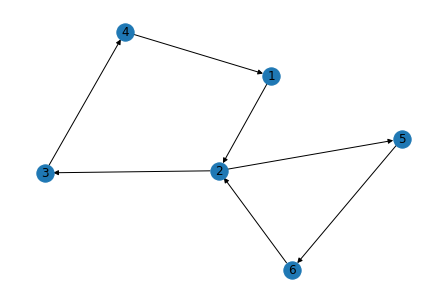

In [62]:
g8 = defaultdict(list)
g8 = {
    1: [2],
    2: [3,5],
    3: [4],
    4: [1],
    5: [6],
    6: [2]
    
}

G8 = nx.DiGraph(g8)
nx.draw(G8,arrows = True, with_labels = True)
count_cycles(g8)

#### 49. Keys and Rooms

In [71]:
class sol:
    def ans(self, arr):
        if arr[0] == []:
            return False
        
        num_rooms = len(arr)
        graph = {room:keys for room,keys in enumerate(arr)}
        
        visited = set()
        q = []
        q.append(0)
    
        while q:
            curr = q.pop(0)
            visited.add(curr)
            
            for adj in graph[curr]:
                if adj not in visited:
                    q.append(adj)
                    
        if len(visited) != num_rooms:
            return False
        else:
            return True
        
a = sol()
a.ans([[1],[2],[3],[]])
a.ans([[],[2],[3],[]])
a.ans([[1,3],[3,0,1],[2],[0]])

False

#### 50. BFS traversal on a 2D Matrix

In [187]:
def bfs_arr(grid,row,col):
    maxRow = len(grid)
    maxCol = len(grid[0])
    visited = [[False for i in range(maxCol)]for i in range(maxRow)]
    dx = [0,0,-1,1]    #left,right,up,down
    dy = [-1,1,0,0]
    q = []
    
    q.append((row,col))
    visited[row][col] = True
    
    while q:
        x,y = q.pop(0)
        print(grid[x][y],end=' ')
        
        for i in range(4):
            adjx = x + dx[i]
            adjy = y + dy[i]
            if isValid(maxRow,maxCol,visited,adjx,adjy):
                q.append((adjx,adjy))
                visited[adjx][adjy] = True
    
def isValid(maxRow,maxCol,visited,row,col):
    if 0 <= row < maxRow  and 0 <= col < maxCol and visited[row][col] == False:
        return True
    else:
        return False

In [107]:
matrix= [ [ 1, 2, 3, 4 ],
          [ 5, 6, 7, 8 ],
          [ 9, 10, 11, 12 ],
          [ 13, 14, 15, 16 ] ]

bfs_arr(matrix,0,0)

1 2 5 3 6 9 4 7 10 13 8 11 14 12 15 16 

#### 51. DFS traversal on a 2D matrix

In [198]:
def dfs_arr(grid,row,col):
    maxRow = len(grid)
    maxCol = len(grid[0])
    visited = [[False for i in range(maxCol)] for i in range(maxRow)]
    dx = [-1,1,0,0]
    dy = [0,0,-1,1]
    get_dfs(grid,row,col,visited,dx,dy)
    

def get_dfs(grid,row,col,visited,dx,dy):
    print(grid[row][col],end=' ')
    visited[row][col] = True

    for i in range(4):
        adjx = row + dx[i]
        adjy = col + dy[i]
        if isValid(grid,adjx,adjy,visited):
            get_dfs(grid,adjx,adjy,visited,dx,dy)

def isValid(grid,row,col,visited):
    if 0 <= row < len(grid) and 0 <= col < len(grid[0]) and visited[row][col] == False:
        return True
    else:
        return False

dfs_arr([[1,2,3],[5,6,7],[9,10,11]],0,0)    

1 5 9 10 6 2 3 7 11 

#### 52. Paint a Matrix

In [112]:
def paint(grid,row,col,new):
    
    maxRow = len(grid)
    maxCol = col
    visited = [[False for i in range(len(grid[0]))]for i in range(maxRow)]
    # Important : Visited is always created for the entire GRID
    dx = [0,0,-1,1]    #left,right,up,down
    dy = [-1,1,0,0]
    q = []
    
    q.append((row,col))
    visited[row][col] = True
    
    while q:
        x,y = q.pop(0)
        grid[x][y] = new
        
        for i in range(4):
            adjx = x + dx[i]
            adjy = y + dy[i]
            if isValid2(maxRow,maxCol,visited,adjx,adjy):
                q.append((adjx,adjy))
                visited[adjx][adjy] = True
                
    for i in grid:
        print(i)
    
def isValid2(maxRow,maxCol,visited,row,col):
    if 0 <= row < maxRow  and 0 <= col <= maxCol and visited[row][col] == False:
        return True
    else:
        return False


In [115]:
image = [
  [0, 0, 1, 0],
  [0, 0, 1, 0],
  [0, 0, 1, 0],
  [0, 0, 1, 0]
]

paint(image,0,1,2)

[2, 2, 1, 0]
[2, 2, 1, 0]
[2, 2, 1, 0]
[2, 2, 1, 0]


#### 53. Check if a given Graph (undirected) is Bipartite

In [164]:
class Solution:
    def isBipartite(self, adjList):
        '''
        :type adjList: list of list of int
        :rtype: bool
        '''
        graph = {k : v for k,v in enumerate(adjList)}
        color = {i : 'white' for i in graph}
        
        for node in graph:
            if color[node] == 'white':
                if self.bipartiteFromNode(graph,node,color):
                    return True
        return False
        
        
    def bipartiteFromNode(self,graph,source,color):
        q = []
        q.append(source)
        color[source] = 'red'
        
        while q:
            curr = q.pop(0)
            for adj in graph[curr]:
                if color[adj] == color[curr]:
                    return False
                else:
                    if color[adj] == 'white':
                        if color[curr] == 'red': 
                            color[adj] = 'green'
                            q.append(adj)
                        else: 
                            color[adj] = 'red'
                            q.append(adj)
                       
        return True
        

True

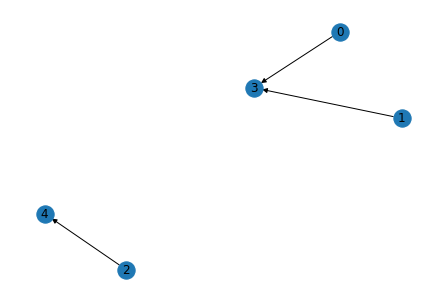

In [166]:
g = {0:[3],1:[3],2:[4],3:[],4:[]}
G = nx.DiGraph(g)
nx.draw(G, with_labels = True)
a = Solution()
a.isBipartite([[3],[3],[4],[],[]])

#### 54. Binary tree Level-order traversal

In [186]:
class Solution:
    def levelOrderTraversal(self, root):
        '''
        :type root: TreeNode
        :rtype: list of list of int
        '''
        result = []
        q = []
        q.append(root)

        while q:
            curr_layer = []
            for i in range(len(q)):
                curr_node = q.pop(0)
                curr_layer.append(curr_node.val)
                if curr_node.left:
                    q.append(curr_node.left)
                if curr_node.right:
                    q.append(curr_node.right)
            result.append(curr_layer)

        return result


#### 55. Search a maze for an exit

In [267]:
def search(maze,row,col,ex,ey):
    # No need of Visited set, as we are using ANS to keep track of visited cells
    # if ANS val is 1, the cell (as of now) is part of the path
    ans = [[0 for i in range(len(maze))] for i in range(len(maze))]
    dx = [-1,1,0,0]
    dy = [0,0,-1,1]

    get_path(maze,row,col,ex,ey,dx,dy,ans)
    for i in ans:
            print(i)
    
def get_path(maze,row,col,ex,ey,dx,dy,ans):
    if row == ex and col == ey:
        ans[row][col] = 1
        return True
    
    ans[row][col] = 1
    
    for i in range(4):
        adjx = row + dx[i]
        adjy = col + dy[i]
        if isValid(maze,adjx,adjy,ans)and get_path(maze,adjx,adjy,ex,ey,dx,dy,ans):
                return True
            
    ans[row][col] = 0 #Backtracking
    return False 

def isValid(maze,row,col,ans):
    if 0 <= row < len(maze) and 0 <= col < len(maze[0]) and maze[row][col]==1 and ans[row][col]==0:
        return True
    else:
        return False

In [268]:
maze1 = [
    [1, 0, 0, 0],
    [1, 1, 0, 1],
    [0, 1, 0, 0],
    [1, 1, 1, 1]
]
maze2 = [
    [1, 1, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 1, 1, 1, 1],
    [1, 1, 0, 0, 1]
]

search(maze2,4,0,4,4)
print()
search(maze2,4,0,0,0)
print()
search(maze1,0,0,3,3)

[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 1, 1, 1, 1]
[1, 1, 0, 0, 1]

[1, 1, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 0, 1, 0, 0]
[0, 1, 1, 0, 0]
[1, 1, 0, 0, 0]

[1, 0, 0, 0]
[1, 1, 0, 0]
[0, 1, 0, 0]
[0, 1, 1, 1]


#### 56. Replace enclosed Os with Xs

In [1]:
class Solution:
    def computeEnclosedRegions(self, board):
        '''
        :type board: list of list of str
        :rtype: list of list of str
        '''
        if len(board) <= 2:
            return board
        
        visited = [[False for i in range(len(board))] for i in range (len(board))]
        dx = [-1,1,0,0]
        dy = [0,0,-1,1]
        q = []
        q.append((1,1))
        visited[1][1] = True

        while q:
            x,y = q.pop(0)

            if board[x][y] == 'O' and board[x+1][y] == 'X' and board[x-1][y] == 'X' and board[x][y+1] == 'X' and board[x][y-1] == 'X':
                board[x][y] = 'X'

            for i in range(4):
                adjx = x + dx[i]
                adjy = y + dy[i]
                if self.isValid(adjx,adjy,board,visited):
                    q.append((adjx,adjy))
                    visited[adjx][adjy] = True

        for i in board:
            print(i)
    
    def isValid(self,x,y,board,visited):
        if 1 <= x < len(board)-1 and 1 <= y < len(board)-1 and visited[x][y] == False:
            return True
        else:
            return False

In [2]:
board = [
  ['X', 'X', 'O', 'X', 'X'],
  ['X', 'X', 'O', 'X', 'X'],
  ['X', 'X', 'O', 'X', 'X'],
  ['X', 'O', 'X', 'O', 'X'], # Os in this row are enclosed, replace them
  ['X', 'X', 'O', 'X', 'X'],
  ['X', 'X', 'O', 'X', 'X']
]
a = Solution()
a.computeEnclosedRegions(board)

['X', 'X', 'O', 'X', 'X']
['X', 'X', 'O', 'X', 'X']
['X', 'X', 'O', 'X', 'X']
['X', 'X', 'X', 'X', 'X']
['X', 'X', 'O', 'X', 'X']
['X', 'X', 'O', 'X', 'X']


#### Topological Ordering

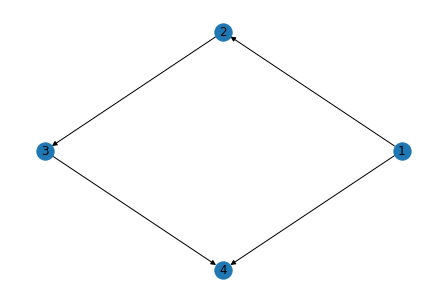

In [44]:
graph = defaultdict(list)
graph = {
    1 : [2,4],
    2 : [3],
    3 : [4],
    4 : []
}

G = nx.DiGraph(graph)
nx.draw_circular(G, arrows = True, with_labels = True)

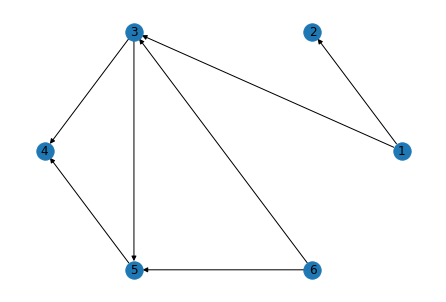

In [72]:
graph2 = defaultdict(list)
graph2 = {
    1 : [2,3],
    2 : [],
    3 : [4,5],
    4 : [],
    5 : [4],
    6 : [3,5],
}

G = nx.DiGraph(graph2)
nx.draw_circular(G, arrows = True, with_labels = True)

In [73]:
def topological(graph):
    degrees = get_degrees(graph)
    s = set()
    for v in degrees:
        if degrees[v] == 0:
            s.add(v)
    
    while s:
        vtx = s.pop()
        print(vtx,end=' ')
        for adj in graph[vtx]:
            degrees[adj] -= 1
            if degrees[adj] == 0:
                s.add(adj)
    

def get_degrees(g):
    degrees = {}
    for v in g:
        degrees[v] = 0
    for v in g:
        for u in g[v]:
            degrees[u] += 1
    return degrees

topological(graph)
print()
topological(graph2)

1 2 3 4 
1 2 6 3 5 4 

# Trees

In [1]:
class Node:
    def __init__(self, val):
        self.val = val
        self.left = None
        self.right = None
        
    def insert(self, val):
        if self.val:
            if val < self.val:
                if self.left is None:
                    self.left = Node(val)
                else:
                    self.left.insert(val)
            elif val > self.val:
                if self.right is None:
                    self.right = Node(val)
                else:
                    self.right.insert(val)
        else:
            self.val = val    
    def print_inorder(self):
        if self.left : 
            self.left.print_inorder()
        print(self.val,end=' ')
        if self.right:
            self.right.print_inorder()
            
    def print_preorder(self):
        print(self.val,end=' ')
        if self.left : 
            self.left.print_preorder()
        if self.right:
            self.right.print_preorder()
            
    def print_postorder(self):
        if self.left : 
            self.left.print_postorder()
        if self.right :
            self.right.print_postorder()
        print(self.val,end=' ')

root = Node(10)
root.insert(7)
root.insert(11)
root.insert(6)
root.insert(8)
root.insert(1)
root.insert(9)
root.insert(20)
root.insert(14)
root.insert(22)
print('Pre-order : ',end='')
root.print_preorder()
print('\nIn-order : ',end='')
root.print_inorder()
print('\nPost-order : ',end='')
root.print_postorder()

Pre-order : 10 7 6 1 8 9 11 20 14 22 
In-order : 1 6 7 8 9 10 11 14 20 22 
Post-order : 1 6 9 8 7 14 22 20 11 10 

                10
                
           7         11
           
        6     8          20
        
     1          9     14    22

In [32]:
def search(node,val):
    if val < node.val:
        if node.left is not None:
            search(node.left, val)
        else:
            print('Not found!')
    elif val > node.val:
        if node.right is not None:
            search(node.right, val)
        else:
            print('Not found!')
    else:
        print('Found!')
        
search(root,23)
search(root,22)

Not found!
Found!


#### 1. Check if Binary tree is symmetric (Mirror image of itself)

In [33]:
class Solution:
    def isSymmetric(self, root):
        '''
        :type root: TreeNode
        :rtype: bool
        '''
        left = []
        right = []
        if root == None:
            return True
        self.nlr(root.left, left)
        self.nrl(root.right, right)
        return (left == right)

    def nlr(self, node, left):   
        left.append(node.val)
        if node.left is not None:
            self.nlr(node.left, left)
        if node.right is not None:
            self.nlr(node.right, left)

    def nrl(self, node, right):
        right.append(node.val)
        if node.right is not None:
            self.nrl(node.right, right)
        if node.left is not None:
            self.nrl(node.left, right)


In [88]:
# another approach : recursively matching left and right subtree nodes
class Solution:
    def isSymmetric(self, root):
        if root == None:
            return True
        
        return check(root.left, root.right)
        
    def check(self, left_subtree, right_subtree):
        if left_subtree == None and right_subtree == None:
            return True
        
        if left_subtree != None and right_subtree != None:
            return (
                    left_subtree.val == right_subtree.val and
                    self.check(left_subtree.left, right_subtree.right) and
                    self.check(left_subtree.right, right_subtree.left)
                )
        return False


#### 2. Sum of the path from root to leaf

In [56]:
def check(node, value):
    total = 0
    
    if check_sum(node, value, total):
        return True
    else:
        return False
    
def check_sum(node, value, total):
    total += node.val
    
    if node.left == None and node.right == None and total == value:
        return True     #base case i.e leaf node reached
    
    if node.left is not None:
        if check_sum(node.left, value, total):
            return True
    if node.right is not None:
        if check_sum(node.right, value, total):
            return True
    
    total -= node.val    #backtracking
    return False

print(check(root,17))
print(check(root,24))
print(check(root,34))
print(check(root,55))
print(check(root,41))

False
True
True
True
False


#### 3. Checking a tree for a BST property

In [59]:
def check(node, mini, maxi):
    if node == None:    #base case : single node is BST
        return True
    if node.val < mini or node.val > maxi: #checking range at each node
        return False 
    # for left sub-tree root.val will be maximum
    # for right sub-tree roo.val will be minimum
    return (check(node.left, mini, node.val) and check(node.right, node.val, maxi))

check(root, -99999999999, 99999999999)

True

#### 4. Build A Min-Height BST From A Sorted Array

In [ ]:
class Solution:
    def sortedArrayToBST(self, nums):
        '''
        :type nums: list of int
        :rtype: TreeNode
        '''
        return self.get_tree(nums, 0, len(nums))

        
    def get_tree(self, nums, left, right):

        if left >= right:    #breaking condition similar to binary search
            return None

        middle = (left+right)//2  

        new_node = TreeNode(nums[middle])
        new_node.left = self.get_tree(nums, left, middle)
        new_node.right = self.get_tree(nums, middle+1, right)

        return new_node

#### 5. Lowest Common Ancestor In A BST

In [89]:
class Solution:
    def lowestCommonAncestor(self, root, x, y):
        '''
        :type root: TreeNode
        :type x: int
        :type y: int
        :rtype: TreeNode
        '''

        if x < root.val and y < root.val:
            return self.lowestCommonAncestor(root.left,x,y)

        if x > root.val and y > root.val:
            return self.lowestCommonAncestor(root.right, x, y)

        return root

#### 6. Depth of a binary tree

In [95]:
'''
Depth - maximum nodes from root to leaf
Recursively calculate heights of left subtree and right subtree.
return the greater height + 1 (accounting for the root)
'''
def get_depth(root):
    if root == None:
        return 0
    
    left_depth = get_depth(root.left)
    right_depth = get_depth(root.right)
    
    return max(left_depth,right_depth)+1
    
get_depth(root)

4

In [35]:

def get_good_nodes(root):
    count = 0
    stack = [(root, root.val)]
    while stack:
        node, prev_max_value = stack.pop()
        if node.val >= prev_max_value:
            count += 1
            prev_max_value = node.val
        if node.left :
             stack.append((node.left, prev_max_value))
        if node.right :
             stack.append((node.right, prev_max_value))
    print(count)
    

get_good_nodes(root)

4


                10
                
           7         11
           
        6     8          20
        
     1          9     14    22

#### 7. Diameter of binary tree

In [104]:
def get_depth(root, ans):
    if root == None:
        return 0
    
    left_depth = get_depth(root.left, ans)
    right_depth = get_depth(root.right, ans)
    
    ans[0] = max(ans[0], left_depth+right_depth+1)
    
    return max(left_depth,right_depth)+1
    
    
def get_diameter(root):
    ans = [-99999999]
    depth = get_depth(root, ans)
    return ans[0]-1,depth-1
    
get_diameter(root)

(6, 3)

# Hashtables

#### 1. Nearest Repeated Entries In An Array

In [105]:
import sys
class Solution:
    def solve(self, sentence):
        '''
        :type sentence: list of str
        :rtype: int
        '''
        words = {}

        for i,word in enumerate(sentence):
            if word not in words:
                words[word] = [i,sys.maxsize] 
            else:
                diff = abs(words[word][0]-i)
                words[word][0] = i
                if diff < words[word][1]:
                    words[word][1] = diff
                    
        mini = sys.maxsize
        for key in words:
            if words[key][1] < mini:
                mini = words[key][1]

        if mini == sys.maxsize:
            return -1
        else:
            return mini
a = Solution()
a.solve(["This","is","a","sentence","with","is","repeated","then","repeated"])

2

#### 2. Longest Substring with At Most K Distinct Characters

In [6]:
# Approach 1: Brute force method --> O(N^2)

import sys
class Solution:
    def solve(self, s, k):
        '''
        :type s: str
        :type k: int
        :rtype: int
        '''
        substrings = []
        for i in range(len(s)):    #generate all substrings
            temp = ''
            j = i
            while j < len(s):
                temp += s[j]
                substrings.append(temp)
                j+=1
        
        longest_length = -sys.maxsize
        
        for string in substrings:    #filtering out the strings to get the answer
            if len(set(string)) == k and len(string) > longest_length:
                longest_length = len(string)

        return (longest_length)


In [12]:
# Approach 2: Optimized method --> O(n)

class Solution:
    def solve(self, s, k):
        '''
        :type s: str
        :type k: int
        :rtype: int
        '''
        chars = {}
        left , right, distinct_count, max_window_size = 0, 0, 0, 0
        
        while right < len(s):
            if s[right] not in chars:
                chars[s[right]] = 1
                distinct_count += 1
            else:
                chars[s[right]] += 1
                
            if distinct_count > k:
                while distinct_count > k:
                    chars[s[left]] -= 1
                    if chars[s[left]] == 0:
                        distinct_count -= 1      #keep pruning left side chars until distinct_count comes to k i.e shortening the window 
                        del chars[s[left]]
                    left += 1
                    
            max_window_size = max(right-left+1, max_window_size)
            right += 1
            
        return max_window_size
    
a = Solution()
a.solve('coffee',2)
        

4

#### 3. Check if one list is subset of another list

In [17]:
def check(list1,list2):
    if len(set(list1) & set(list2)) == len(list1) or len(set(list1) & set(list2)) == len(list2):
        return True
    else:
        return False
    
check([1,2,3,4,5],[2,5])
check([1,2,3,4,5],[])

True

In [38]:
b = set()
a = [1,2]
b.add(tuple(a[::-1]))    #Tuple is hashable
b
#b.add([2,3])     list is Unhashable

{(2, 1)}

#### 4. Find symmetric pairs in a list

In [40]:
def find_symmetric(my_list):
    # Write your code here
    pairs = set()
    symm = []
    for each in my_list:
        if tuple(each[::-1]) not in pairs:
            pairs.add(tuple(each))
        else:
            symm.append(each)
            symm.append(each[::-1])

    return symm


#### 5. Trace the complete path of a journey

In [93]:
# Approach 1 : Using Topological Sorting --> O(V+E)
# This solution is general

def get_path(g):
    order = get_topological(g)
    for i,v in enumerate(order):
        print(v,end='')
        if i < len(order)-1:
            print(' --> ',end='')
        
def get_topological(g):
    degrees = get_degrees(g)
    s = set()
    result = []
    for vtx in g:
        if degrees[vtx] == 0:
            s.add(vtx)
            
    while s:
        vtx = s.pop()
        result.append(vtx)
        if vtx in g:       # to handle the nodes with out-degree = 0
            adj = g[vtx]
            degrees[adj] -= 1
            if degrees[adj] == 0:
                s.add(adj)
    return result
        
def get_degrees(g):
    degrees = {}
    for v in g:
        degrees[v] = 0

    for k,v in g.items():
        if v not in g:    # since there could be a nodes with out-degree = 0
            degrees[v] = 1
        else:
            degrees[v] += 1
    return degrees
        
get_path({
  "NewYork": "Chicago",
  "Boston": "Texas",
  "Missouri": "NewYork",
  "Texas": "Missouri"
})

Boston --> Texas --> Missouri --> NewYork --> Chicago

In [96]:
# Approach 2 : Reverse the dictionary to get the starting point or create set of values --> O(n)
# This solution assumes there is only one starting point i.e only one node with in-degree = 0
def get_path2(pairs):
    degree_one = set()
    for k,v in pairs.items():
        degree_one.add(v)
    for key in pairs:
        if key not in degree_one:
            starting = key
    q = set()
    q.add(starting)
    while q:
        vtx = q.pop()
        print(vtx,end=' ')
        if vtx in pairs:
            adj = pairs[vtx]
            q.add(adj)

get_path2({
  "NewYork": "Chicago",
  "Boston": "Texas",
  "Missouri": "NewYork",
  "Texas": "Missouri"
})


Boston Texas Missouri NewYork Chicago 

#### 6. Find any two pairs such that a+b = c+d

In [192]:
def ans(nums):
    sums = {}
    for i in range(len(nums)-1):
        j = i+1
        while j < len(nums):
            sums[nums[i]+nums[j]] = (nums[i],nums[j])
            j += 1
            
    s = set(nums)
    for k in sums:
        for i in nums:
            if k-i in s and k-i != i and i not in sums[k] and k-i not in sums[k]:
                print(sums[k], (k-i,i))
                return

ans([3, 4, 7, 1, 12, 9])
print()
ans([1,2,3,4,5,6,7])

(1, 9) (7, 3)

(2, 3) (4, 1)


#### 7. 4 sum :::: a+b+c+d = e

In [213]:
def four_sum(nums,e):
    sums = {}
    
    for i in range(len(nums)-1):
        j = i+1
        while j < len(nums):
            sums[e-nums[i]-nums[j]] = (nums[i],nums[j])
            j += 1
            
    s = set(nums)
    seen = set()    # a set of strings to keep track of unique sets
    results = []
    for k in sums:
        for i in nums:
            if k - i in s and k-i != i and i not in sums[k] and k-i not in sums[k] :
                    temp = set([sums[k][0],sums[k][1],k-i,i])
                    if str(temp) not in seen:
                            seen.add(str(temp))
                            results.append(temp)
                    
    print(results)
                    
four_sum([3, 4, 7, 1, 12, 9], 17)
four_sum([1,2,3,4,5,6,7], 18)


[{9, 3, 4, 1}, {1, 3, 4, 9}]
[{2, 3, 6, 7}, {2, 4, 5, 7}, {3, 4, 5, 6}, {1, 4, 6, 7}]


#### 8. 3 sum :::: a+b+c = d

In [214]:
# Approach 1 : Using simple hash map , Only when all numbers are distinct and unique
def three_sum(nums,d):
    sums = {}
    for i in nums:
        sums[d-i] = i
    
    s = set(nums)
    seen = set()
    result = []
    for k in sums:
        for i in nums:
            if k-i in s and k-i != i and i != sums[k] and k-i != sums[k]:
                temp = set([i,k-i,sums[k]])
                if str(temp) not in seen:
                    seen.add(str(temp))
                    result.append(temp)
               
    print(result)
    
three_sum([1,2,3,4,5,6],9)

[{1, 2, 6}, {1, 3, 5}, {2, 3, 4}]


#### 9. Four sum of 4 arrays

In [12]:
# Approach 1 : Saving the pairs itself in the dictionary
# Covers almost all cases

class Solution:
    def Four_Sum(self, nums1, nums2, nums3, nums4):
        '''
        :type nums1: list of int
        :type nums2: list of int
        :type nums3: list of int
        :type nums4: list of int
        :rtype: int
        '''
        sums = {}
         
        for i in nums1:        # NOTE! storing (a,b):sum as tuple:value pairs ensures
            for j in nums2:    # that repeated sum values are stored
                sums[(i,j)] = i+j
        
        arr4 = set(nums4)
        
        for k,v in sums.items():
            for i in nums3:
                if -v-i in arr4:
                    x,y = k
                    print(x,y,i,-v-i)
            
a = Solution()
a.Four_Sum([3,2,1], [4,-1,-2], [-1,2,-4], [2,0,3])

3 -1 -4 2
3 -2 -1 0
3 -2 -4 3
2 -1 -1 0
2 -1 -4 3
1 -2 -1 2


In [13]:
# Approach 2 : Saving the occurence of sum as count, as we only need the total count
# of how many times the sum occurs, not the pairs themselves
# Then checking by running 
# Covers all cases

class Solution:
    def Four_Sum(self, nums1, nums2, nums3, nums4):
        '''
        :type nums1: list of int
        :type nums2: list of int
        :type nums3: list of int
        :type nums4: list of int
        :rtype: int
        '''
        sums = {}
        
        for i in nums1:        # storing (a,b):sum as tuple:value pairs ensures that
            for j in nums2:    # repeated sum values are stored
                if i+j in sums:
                    sums[i+j] += 1
                else:
                    sums[i+j] = 1
        
        arr4 = set(nums4)
        count = 0
        for a in nums3:
            for b in nums4:
                if -a-b in sums:
                    count += sums[-a-b]   # each increment itself accounts for the a,b
        
        print(count)
a = Solution()
a.Four_Sum([3,2,1], [4,-1,-2], [-1,2,-4], [2,0,3])

6


In [7]:
import sys

string = ''

for line in sys.stdin:
    string += line.capitalize()

print(string)

In [5]:
'apple\n'.rstrip()

'apple'